In [2]:
import glob
import numpy as np
import pandas as pd
import os, shutil
# import utils
from collections import defaultdict
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
# from utils import *
#from __future__ import division, print_function
from collections import defaultdict
from keras.applications import VGG16

from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.applications.xception import preprocess_input
from keras.models import Model
from keras import backend as K
import random, glob
import pickle
# import autotime
# %load_ext autotime

Using TensorFlow backend.


## Color Identification for Grapes

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

%matplotlib inline

In [0]:
# all_jpeg_files = glob.glob('/data/grapes_new/image_data/discoloration/*.jp*')

In [0]:
# for x in all_jpeg_files[0:1]:
#     print(x)
#     image = cv2.imread(x)
#     print("The type of this input is {}".format(type(image)))
#     print("Shape: {}".format(image.shape))
#     plt.imshow(image)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     plt.imshow(image)

The type of this input is <class 'numpy.ndarray'>
Shape: (183, 275, 3)


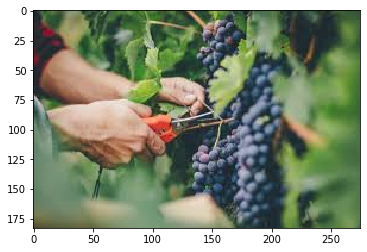

In [126]:
image= cv2.imread('/images (3).jpeg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [0]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [0]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
    
def get_colors(image, number_of_colors, show_chart):    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
#     print("modified_image before",modified_image.shape)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
#     print("modified_image after", modified_image.shape)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    # print(list(counts.values()), sum(list(counts.values())))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    # print(type(ordered_colors))
    # ordered_colors= [int(x) for x in ordered_colors for j in x]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = ordered_colors, colors = hex_colors)
    
    return rgb_colors,list(counts.values())

In [0]:
# get_colors(get_image(all_jpeg_files[1]), 8, True)
# get_colors(image, 8, True) # 8 is number of colors (clusters)

In [0]:
# IMAGE_DIRECTORY = '/data/grapes_new/image_data/discoloration/'
# COLORS = {
#     'GREEN': [0, 128, 0],
#     'RED': [255, 0, 0],
#     'MAROON': [150, 37, 70],
#     'BLACK': [0, 0, 0],
#     'YELLOW': [255,255,0]
# }
# images = []
# images_file = []
# for file in os.listdir(IMAGE_DIRECTORY):
#     if not file.startswith('.'):
# #         print(os.path.join(IMAGE_DIRECTORY, file))
# #         print(file)
#         images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))
#         images_file.append(os.path.join(IMAGE_DIRECTORY, file))
        

In [0]:
COLORS = {
    'GREEN': [0, 128, 0],
    'YELLOW': [255,255,0],
    # 'RED': [255, 0, 0],
    'RED': [180, 71, 113],
    # 'MAROON': [150, 37, 70],
    'MAROON': [119, 61, 104],
    'BLACK': [0, 0, 0], 
}

In [0]:
def get_dist_for_colors(image, colors, number_of_colors = 8): 
    color_dists= []
    min_dist= 100000000000 
    image_colors, counts = get_colors(image, number_of_colors, True)
    sum_counts= sum(counts)
    pcntg_color= [(x/sum_counts)*100 for x in counts]
    for color, color_val in colors.items():
      color_lab = rgb2lab(np.uint8(np.asarray([[color_val]])))
      diffs=[]
      for i in range(number_of_colors):
          color_cluster_lab = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
          diff = deltaE_cie76(color_lab, color_cluster_lab)
          diffs.append(diff[0][0]*(1000/pcntg_color[i]))
      if(min(diffs)< min_dist):
        min_dist= min(diffs)
        closest_color= color
      color_dists.append(diffs)
    return color_dists, min_dist, closest_color

This is Black colored Grape


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


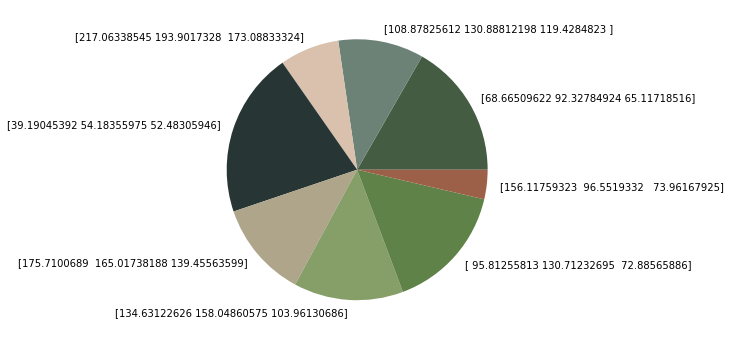

In [132]:
color_dists, min_dist, closest_color= get_dist_for_colors(image, COLORS, 8)
if (closest_color == 'GREEN' or closest_color=='YELLOW'):
  print("This is Green colored Grape")
elif (closest_color == 'RED' or closest_color=='MAROON'):
   print("This is Red colored Grape")
else:
   print("This is Black colored Grape")

In [133]:
color_dists, min_dist, closest_color

([[3177.8732474109624,
   5907.051558992492,
   10240.396433389462,
   3524.1762427262747,
   5497.153152082307,
   3237.5839825696085,
   2317.5519653707975,
   21467.751338890273],
  [6101.846947331016,
   9640.068355244086,
   11845.15008977636,
   5986.4200786358215,
   7324.295172613139,
   5666.239688094331,
   5216.554985519026,
   26710.89866385365],
  [3917.2705996481272,
   5572.348446932809,
   7620.664887092323,
   2943.9384995107307,
   4687.778150421396,
   5423.860106589099,
   4943.680586647633,
   9883.33134352739],
  [3210.8489504538506,
   4591.1357544956645,
   7963.6145973792245,
   2076.128677360872,
   4580.747390067639,
   5126.653955601478,
   4518.727752792549,
   11117.385843475584],
  [2479.2201284761873,
   5046.28269668719,
   10952.13076721817,
   1088.926987868089,
   5828.903855314489,
   5137.651379939349,
   3969.1133553358623,
   15574.542586300973]],
 1088.926987868089,
 'BLACK')

In [0]:
# diffs=[]
# def show_selected_images(image, color, colors_to_match):
#     index = 1
#     diff = match_image_by_color(image, color, threshold, colors_to_match)
#     # print(diff)
#     diffs.append(diff)
#     return diffs


In [0]:
# show_selected_images(image, COLORS['GREEN'], 8)
# show_selected_images(image, COLORS['YELLOW'], 8)
# show_selected_images(image, COLORS['RED'], 8)
# show_selected_images(image, COLORS['MAROON'], 8)
# show_selected_images(image, COLORS['BLACK'], 8)

In [0]:
import colorsys

In [0]:

# a= colorsys.rgb_to_hsv(133.1902118 , 141.71523386,  75.65919621)
# a1= colorsys.rgb_to_hsv(235.12171931, 243.11820254, 244.04597851)
# a2= colorsys.rgb_to_hsv(9.46163481, 17.25761371,  2.7966381)
# a3= colorsys.rgb_to_hsv(140.60313192, 155.09956162, 119.81226556)
# a4= colorsys.rgb_to_hsv(74.55787649, 83.85200627, 44.69517834)
# a5= colorsys.rgb_to_hsv(106.63722058, 120.90450541,  95.23188796)
# a6= colorsys.rgb_to_hsv(166.44225533, 183.51681884, 178.46355919)
# a7= colorsys.rgb_to_hsv(116.22180436, 121.75519448,  48.46467753)
# a,a1,a2,a3,a4,a5,a6,a7


In [0]:
colorsys.rgb_to_hsv(255, 0, 0)

(0.0, 1.0, 255)

time: 3.17 ms


In [0]:
# # !pip install colormath
# from colormath.color_objects import sRGBColor, LabColor
# from colormath.color_conversions import convert_color
# from colormath.color_diff import delta_e_cie2000

# # Red Color
# color1_rgb = sRGBColor(235.12171931, 243.11820254, 244.04597851);

# # Blue Color
# color2_rgb = sRGBColor(106.63722058, 120.90450541,  95.23188796);

# # Convert from RGB to Lab Color Space
# color1_lab = convert_color(color1_rgb, LabColor);

# # Convert from RGB to Lab Color Space
# color2_lab = convert_color(color2_rgb, LabColor);

# # Find the color difference
# delta_e = delta_e_cie2000(color1_lab, color2_lab);

# print ("The difference between the 2 color = ", delta_e)
